# Project: Wrangling and Analyze Data

- [Introduction](#intro)
- [Data Gathering](#gathering)
- [Assessing Data](#assessing)
- [Cleaning Data](#cleaning)
- [Storing Data](#storing)
- [Analyzing and Visualizing Data](#analyzing)

<a id='intro'></a>
## Introduction

*General Intro, remind to write when finished*

In [1]:
#load libraries
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Download the image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
# Save the file as tsv
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
img_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Did not grand the twitter API access, download the tweet-json.txt directly
# Read downloaded txt file line by line into a pandas DataFrame
json_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        json_lines = json.loads(line)
        tweet_id = json_lines['id']
        retweet_count = json_lines['retweet_count']
        favorite_count = json_lines['favorite_count']
        json_list.append({'tweet_id': tweet_id,
                        'retweets': retweet_count,
                        'likes': favorite_count})
tweet_json = pd.DataFrame(json_list, columns=['tweet_id', 'retweets', 'likes'])
tweet_json.head()

,tweet_id,retweets,likes
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assessing'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### 1. Tweet Archive Table

In [6]:
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
tweet_archive.duplicated().sum()

0

In [10]:
tweet_archive.tweet_id.duplicated().sum()

0

In [11]:
tweet_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [12]:
tweet_archive[tweet_archive.rating_denominator==0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [13]:
tweet_archive[tweet_archive.rating_denominator!=10].count()[0]

23

In [14]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [15]:
tweet_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [16]:
tweet_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

### 2. image predication table

In [17]:
img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
img_predictions.duplicated().sum()

0

In [21]:
img_predictions.tweet_id.nunique()

2075

In [22]:
img_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

### 3. tweet json table

In [23]:
tweet_json

,tweet_id,retweets,likes
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [24]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2354 non-null   int64
 1   retweets  2354 non-null   int64
 2   likes     2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
tweet_json.duplicated().sum()

0

### Quality issues
#### twitter archive table
- Timestamp is str not datetime
- 181 retweets identifies as retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, they will be removed
- 78 replies identifies as in_reply_to_status_id, in_reply_to_user_id, they will be removed as well
- Missing values in expand_urls column
- Extreme numbers in rating denominators, 23 denominators are not 10
- Extreme numbers in rating numerators
- Some dogs' names are invalid (e.g. None, a, such, etc)

#### image predications table
- Some photos are not identified as dogs (orange, bagel, banana, etc), p#_dog = False
- Inconsistent capitalizations in names of dog breeds
- p#, p#_conf, p#_dog should be converted into dog_breed and confidence columns

#### tweet json table


### Tidiness issues
- Dog stage data in tweet archive table is divided into columns doggo, floofer, pupper, and puppo
- Some columns related to analysis in img predications and tweet json tables can be merged into main archive table

<a id='cleaning'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [26]:
# Make copies of original pieces of data
tweet_archive_clean = tweet_archive.copy()
img_predictions_clean = img_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: Retweets and replies are not necessary for the analysis

#### Define: Delete columns related to retweet and in_reply

#### Code

In [27]:
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.retweeted_status_id.isnull()]
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.in_reply_to_status_id.isnull()]

In [28]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [29]:
tweet_archive_clean = tweet_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                          'retweeted_status_user_id', 'retweeted_status_timestamp'],axis=1)

#### Test

In [30]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #2: Timestamp is str not datetime

#### Define: Change dtype of timestamp to datetime

#### Code

In [31]:
tweet_archive_clean.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [32]:
tweet_archive_clean.loc[:, 'timestamp'] = pd.to_datetime(tweet_archive_clean['timestamp'].str[:-6])

#### Test

In [33]:
tweet_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Issue #3: Missing value in expand_urls column

#### Define: Drop rows with null values

#### Code

In [34]:
tweet_archive_clean = tweet_archive_clean.loc[~tweet_archive_clean.expanded_urls.isnull()]

#### Test

In [35]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2094 non-null   int64         
 1   timestamp           2094 non-null   datetime64[ns]
 2   source              2094 non-null   object        
 3   text                2094 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2094 non-null   int64         
 6   rating_denominator  2094 non-null   int64         
 7   name                2094 non-null   object        
 8   doggo               2094 non-null   object        
 9   floofer             2094 non-null   object        
 10  pupper              2094 non-null   object        
 11  puppo               2094 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.7+ KB


### Issue #4: Some dogs' names are invalid (e.g. None, a, by, such, etc)

#### Define: Replace all lowercase values to 'None'

#### Code

In [36]:
# Replace all values start with lowercase into None
tweet_archive_clean.name = tweet_archive_clean.name.str.replace('^[a-z]+', 'None', regex=True)

#### Test

In [37]:
tweet_archive_clean.name.value_counts()

None          704
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 930, dtype: int64

In [38]:
tweet_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

### Issue #5: Dog stage data in tweet archive table is divided into 4 columns

#### Define: Create a column 'dog_stage'

##### Code

In [39]:
#Extract 'text' from the columns and create new column
tweet_archive_clean['dog_stage'] = tweet_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

tweet_archive_clean = tweet_archive_clean.drop(columns=['doggo','floofer', 'pupper', 'puppo'])

#### Test

In [40]:
tweet_archive_clean.dog_stage.value_counts()

pupper     239
doggo       80
puppo       29
floofer      4
Name: dog_stage, dtype: int64

### Issue #6: Extreme numbers in rating numerators

#### Define: Explore the rating numerators from text, then change to proper numbers

##### Code

In [41]:
tweet_archive_clean['rating_numerator'] = tweet_archive_clean['rating_numerator'].astype(float)
tweet_archive_clean['rating_denominator'] = tweet_archive_clean['rating_denominator'].astype(float)

In [42]:
pd.set_option('display.max_colwidth', None)

# Select the rows with numerator contain decimals
tweet_archive_clean[tweet_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/var/folders/z7/8_wbs0mj575gt_mn4mp5jp_40000gp/T/ipykernel_68621/4205009783.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tweet_archive_clean[tweet_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [43]:
# Change the numerators
rating = tweet_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
tweet_archive_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
tweet_archive_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

### Issue #7: Some rating denominators are not equal to 10

#### Define: Explore the rating denominators from text, then change to proper numbers

#### Code

In [44]:
# Select the rows with denominators contain decimals
tweet_archive_clean[tweet_archive_clean.text.str.contains(r"(\d+\/(\d+\.\d+))")][['text', 'rating_numerator', 'rating_denominator']]

/var/folders/z7/8_wbs0mj575gt_mn4mp5jp_40000gp/T/ipykernel_68621/1930848245.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tweet_archive_clean[tweet_archive_clean.text.str.contains(r"(\d+\/(\d+\.\d+))")][['text', 'rating_numerator', 'rating_denominator']]


,text,rating_numerator,rating_denominator


In [45]:
# Find the rating with pattern "xx/yy"
pattern = r"(\d+/\d+)[^\d]+(\d+/\d+)"
tweet_archive_clean[tweet_archive_clean.text.str.contains(pattern)][['text', 'rating_numerator', 'rating_denominator']]

/var/folders/z7/8_wbs0mj575gt_mn4mp5jp_40000gp/T/ipykernel_68621/174659608.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  tweet_archive_clean[tweet_archive_clean.text.str.contains(pattern)][['text', 'rating_numerator', 'rating_denominator']]


,text,rating_numerator,rating_denominator
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,10.0
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10.0
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1222,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10.0,10.0
1359,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9.0,10.0
1459,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4.0,10.0
1465,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10.0,10.0
1508,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5.0,10.0


Manually replace the ratings for indexes: 1068, 1165, 1202, 1662, and 2335. From the text, some tweets contain multiple ratings for more than one dogs. Generally, wouldn't make any change if ratings are for the first dog and the denominator = 10.0. 

In [46]:
tweet_archive_clean.loc[tweet_archive_clean.index == 1068, ['rating_numerator']] = 14.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1068, ['rating_denominator']] = 10.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1165, ['rating_numerator']] = 13.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1165, ['rating_denominator']] = 10.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1202, ['rating_numerator']] = 11.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1202, ['rating_denominator']] = 10.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1662, ['rating_numerator']] = 10.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1662, ['rating_denominator']] = 10.0
tweet_archive_clean.loc[tweet_archive_clean.index == 2335, ['rating_numerator']] = 9.0
tweet_archive_clean.loc[tweet_archive_clean.index == 2335, ['rating_denominator']] = 10.0

In [47]:
# Select rating_denominators not equal to 10
ratings = tweet_archive_clean.query('rating_denominator != 10.0')[['text', 'rating_numerator', 'rating_denominator']]
ratings

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0


In these cases, some ratings are overall ratings for a group of dogs, will divide the ratings evenlly. For row index 516, there is no rating for the dog, will drop this row.

In [48]:
tweet_archive_clean = tweet_archive_clean.drop(516)
tweet_archive_clean.loc[tweet_archive_clean.index == 433, ['rating_numerator']] = 12.0
tweet_archive_clean.loc[tweet_archive_clean.index == 902, ['rating_numerator']] = 11.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1120, ['rating_numerator']] = 12.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1228, ['rating_numerator']] = 11.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1254, ['rating_numerator']] = 10.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1274, ['rating_numerator']] = 9.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1351, ['rating_numerator']] = 12.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1433, ['rating_numerator']] = 11.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1635, ['rating_numerator']] = 11.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1779, ['rating_numerator']] = 12.0
tweet_archive_clean.loc[tweet_archive_clean.index == 1843, ['rating_numerator']] = 11.0

In [49]:
# Replace denominators into 10.0
tweet_archive_clean['rating_denominator'] = 10.0

#### Test

In [50]:
tweet_archive_clean.rating_numerator.value_counts()

12.00      489
10.00      436
11.00      419
13.00      288
9.00       154
8.00        98
7.00        51
14.00       39
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
1776.00      1
11.26        1
11.27        1
9.75         1
0.00         1
13.50        1
420.00       1
Name: rating_numerator, dtype: int64

In [51]:
tweet_archive_clean.rating_denominator.value_counts()

10.0    2093
Name: rating_denominator, dtype: int64

### Issue #8: Some photos are not identified as dogs

#### Define: Create two new columns 'breed' and 'confidence' with with highest confidence prediction

#### Code

In [52]:
# Define a function that takes a row and returns the highest confident prediction or np.nan
def get_breed_confidence(row):
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        return (row['p1'], row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        return (row['p2'], row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        return (row['p3'], row['p3_conf'])
    else:
        return (np.nan, np.nan)
    
img_predictions_clean[['breed', 'confidence']] = img_predictions_clean.apply(lambda row: pd.Series(get_breed_confidence(row)), axis=1)

In [53]:
# Save the dataframe only with 'tweet_id', 'jpg_url', 'breed' and 'confidence'
img_predictions_clean = img_predictions_clean[['tweet_id', 'jpg_url', 'breed', 'confidence']]

#### Test

In [54]:
img_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


### Issue #9: Inconsistent capitalizations in names of dog breeds

#### Define: Normalize the capitalization in column breed

#### Code

In [55]:
img_predictions_clean['breed'] = img_predictions_clean['breed'].str.capitalize()

#### Test

In [56]:
img_predictions_clean.breed.value_counts()

Golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Japanese_spaniel        1
Scotch_terrier          1
Standard_schnauzer      1
Entlebucher             1
Clumber                 1
Name: breed, Length: 111, dtype: int64

### Issue #10: Some columns related to analysis in img predications and tweet json tables

#### Define: Merged into main archive table

In [57]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2093 non-null   int64         
 1   timestamp           2093 non-null   datetime64[ns]
 2   source              2093 non-null   object        
 3   text                2093 non-null   object        
 4   expanded_urls       2093 non-null   object        
 5   rating_numerator    2093 non-null   float64       
 6   rating_denominator  2093 non-null   float64       
 7   name                2093 non-null   object        
 8   dog_stage           352 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 163.5+ KB


In [58]:
img_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


#### Code

In [59]:
df_cleaned = pd.merge(tweet_archive_clean, img_predictions_clean, on='tweet_id')
df_cleaned = pd.merge(df_cleaned, tweet_json_clean, on = 'tweet_id')

#### Test

In [60]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1970 non-null   int64         
 1   timestamp           1970 non-null   datetime64[ns]
 2   source              1970 non-null   object        
 3   text                1970 non-null   object        
 4   expanded_urls       1970 non-null   object        
 5   rating_numerator    1970 non-null   float64       
 6   rating_denominator  1970 non-null   float64       
 7   name                1970 non-null   object        
 8   dog_stage           322 non-null    object        
 9   jpg_url             1970 non-null   object        
 10  breed               1462 non-null   object        
 11  confidence          1462 non-null   float64       
 12  retweets            1970 non-null   int64         
 13  likes               1970 non-null   int64       

<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
df_cleaned.to_csv('twitter_archive_master.csv', index=False)

<a id='analyzing'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight #1: Most common dog breeds

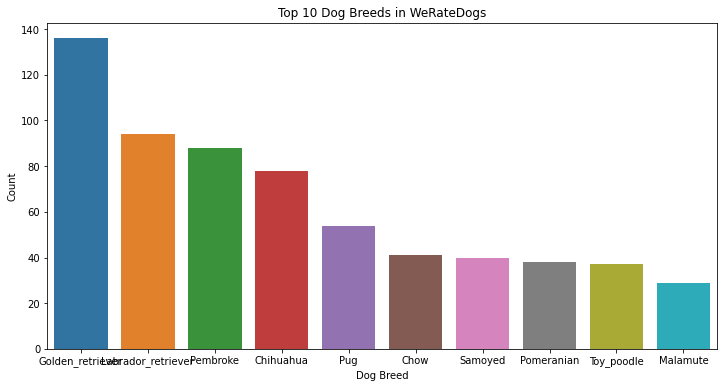

In [62]:
top_breeds = df_cleaned['breed'].value_counts().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_breeds.index, y=top_breeds.values)
plt.title('Top 10 Dog Breeds in WeRateDogs')
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.show()

The top 10 most common dog breeds are golden retriever, labrador retriever, Pembroke, Chihuahua, Pug, Chow, Samoyed, Poeranian, Toy_poodle, and Malamute.

### Insight #2: Popular dog stages

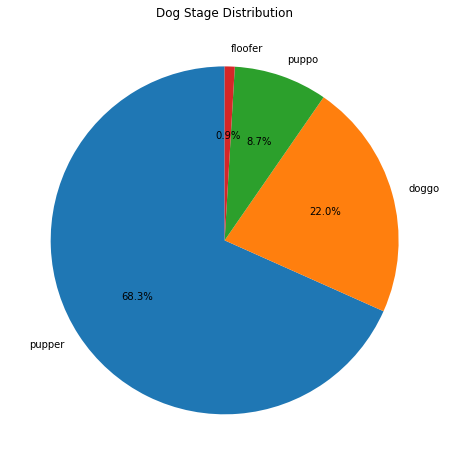

In [63]:
stage_counts = df_cleaned['dog_stage'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(stage_counts, labels=stage_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Dog Stage Distribution')
plt.show()

The stage of pupper is the most popular.

### Insight #3: Breed of dogs got the highest retweet and favorite counts on average

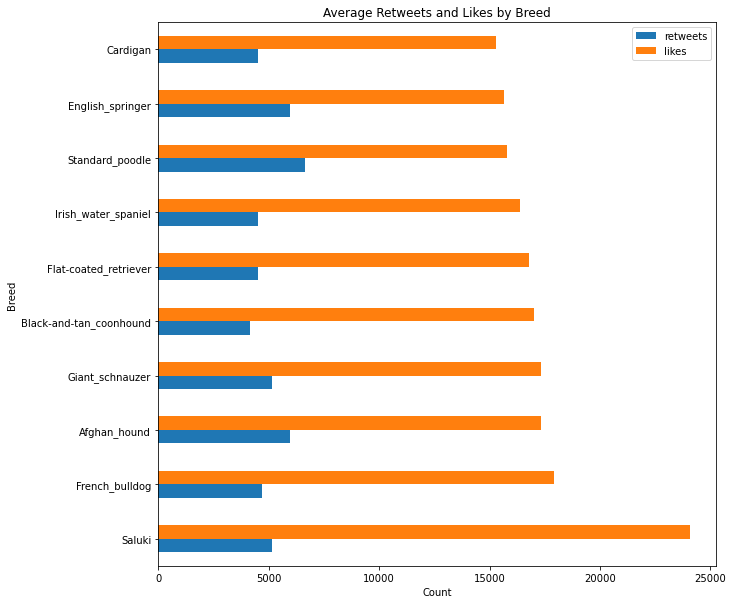

In [64]:
breed_data = df_cleaned[['breed', 'retweets', 'likes']]
breed_grouped = breed_data.groupby(['breed']).mean()

# Sort the top 10 breeds by descending order of average likes
breed_grouped = breed_grouped.sort_values('likes', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 10))
breed_grouped.plot(kind='barh', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Breed')
ax.set_title('Average Retweets and Likes by Breed')
plt.show()

Saluki has the highest average likes, and standard poodle has the highest average retweets.

## References

https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html

https://stackoverflow.com/questions/50633935/pandas-replace-all-strings-in-lowercase-in-a-column-with-none

https://www.bogotobogo.com/python/python_regularExpressions.php

https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe